In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as mcolors

import matplotlib
matplotlib.rcParams['font.family'] = 'Nimbus Sans'
plt.rcParams['font.size'] = 9

import pandas as pd
import numpy as np
import os


In [3]:
treatment_times = pd.read_csv('csvs/treatment_times.csv', index_col=False)
treatment_times['datetime'] = pd.to_datetime(treatment_times['datetime'], format= "%Y-%m-%d %H:%M:%S")
treatment_times['date'] = pd.to_datetime(treatment_times['date'], format= "%Y-%m-%d")

In [5]:
# bombus_listdir = [file for file in os.listdir('/home/misha/data/bee_cam/all_bombus') if file.endswith('.jpg')]
# file_df = pd.DataFrame(bombus_listdir)
# file_df[['pi', 'datetime']] = file_df[0].str.extract(r'^pi(\d+)_(\d{8}_\d{6})')
# file_df['pi'] = file_df['pi'].astype(int)
# file_df['datetime'] = pd.to_datetime(file_df['datetime'], format='%Y%m%d_%H%M%S')
# file_df = file_df.rename(columns={0: 'filename'})
# file_df = file_df.sort_values(by=['pi', 'datetime'], ascending=[True, True]).reset_index(drop=True)
# file_df['date'] = pd.to_datetime(file_df['datetime'].dt.date)
# file_df['time_diff'] = file_df.groupby(['pi', 'date'])['datetime'].diff().dt.total_seconds()

file_df = pd.read_csv('csvs/clean_dfs/bombus_df.csv')
file_df['datetime'] = pd.to_datetime(file_df['datetime'], format='%Y-%m-%d %H:%M:%S')
# file_df = file_df.sort_values(by=['pi', 'datetime'], ascending=[True, True]).reset_index(drop=True)

bombus_visits = file_df[(file_df['time_diff'] > 4) | (file_df['time_diff'].isna())]
bombus_visits


,filename,species,sex,pi,datetime,date,time_diff
0,pi1_20240711_084351.jpg,vosnesenskii,female,1,2024-07-11 08:43:51,2024-07-11,NaN
1,pi1_20240711_090237.jpg,fervidus,female,1,2024-07-11 09:02:37,2024-07-11,NaN
2,pi1_20240711_095506.jpg,fervidus,female,1,2024-07-11 09:55:06,2024-07-11,3149.0
3,pi1_20240711_104047.jpg,fervidus,female,1,2024-07-11 10:40:47,2024-07-11,2741.0
4,pi1_20240711_120641.jpg,fervidus,female,1,2024-07-11 12:06:41,2024-07-11,5154.0
...,...,...,...,...,...,...,...
1852,pi8_20240801_123139.jpg,nevadensis,male,8,2024-08-01 12:31:39,2024-08-01,NaN
1853,pi8_20240825_133559.jpg,fervidus,male,8,2024-08-25 13:35:59,2024-08-25,NaN
1854,pi9_20240804_120508.jpg,vosnesenskii,female,9,2024-08-04 12:05:08,2024-08-04,NaN
1855,pi9_20240804_121508.jpg,nevadensis,male,9,2024-08-04 12:15:08,2024-08-04,NaN


In [6]:
file_df

,filename,species,sex,pi,datetime,date,time_diff
0,pi1_20240711_084351.jpg,vosnesenskii,female,1,2024-07-11 08:43:51,2024-07-11,NaN
1,pi1_20240711_090237.jpg,fervidus,female,1,2024-07-11 09:02:37,2024-07-11,NaN
2,pi1_20240711_095506.jpg,fervidus,female,1,2024-07-11 09:55:06,2024-07-11,3149.0
3,pi1_20240711_104047.jpg,fervidus,female,1,2024-07-11 10:40:47,2024-07-11,2741.0
4,pi1_20240711_120641.jpg,fervidus,female,1,2024-07-11 12:06:41,2024-07-11,5154.0
...,...,...,...,...,...,...,...
1853,pi8_20240825_133559.jpg,fervidus,male,8,2024-08-25 13:35:59,2024-08-25,NaN
1854,pi9_20240804_120508.jpg,vosnesenskii,female,9,2024-08-04 12:05:08,2024-08-04,NaN
1855,pi9_20240804_121508.jpg,nevadensis,male,9,2024-08-04 12:15:08,2024-08-04,NaN
1856,pi9_20240804_121509.jpg,nevadensis,male,9,2024-08-04 12:15:09,2024-08-04,1.0


In [7]:

file_df_apis = pd.read_csv('csvs/clean_dfs/apis_df.csv')
file_df_apis

,filename,Order,family,genus,species,sex
0,pi10_20240808_152658.jpg,Hymenoptera,Apidae,Apis,mellifera,female
1,pi10_20240810_151632.jpg,Hymenoptera,Apidae,Apis,mellifera,female
2,pi10_20240816_181239.jpg,Hymenoptera,Apidae,Apis,mellifera,female
3,pi10_20240827_152056.jpg,Hymenoptera,Apidae,Apis,mellifera,female
4,pi10_20240827_152601.jpg,Hymenoptera,Apidae,Apis,mellifera,female
...,...,...,...,...,...,...
205,pi9_20240731_171503.jpg,Hymenoptera,Apidae,Apis,mellifera,female
206,pi9_20240806_160443.jpg,Hymenoptera,Apidae,Apis,mellifera,female
207,pi9_20240813_165823.jpg,Hymenoptera,Apidae,Apis,mellifera,female
208,pi9_20240813_165824.jpg,Hymenoptera,Apidae,Apis,mellifera,female


In [8]:
# apis_listdir = [file for file in os.listdir('/home/misha/data/bee_cam/apis') if file.endswith('.jpg')]

# file_df_apis = pd.DataFrame(apis_listdir)
file_df_apis[['pi', 'datetime']] = file_df_apis['filename'].str.extract(r'^pi(\d+)_(\d{8}_\d{6})')
file_df_apis['pi'] = file_df_apis['pi'].astype(int)
file_df_apis['datetime'] = pd.to_datetime(file_df_apis['datetime'], format='%Y%m%d_%H%M%S')
# file_df_apis = file_df_apis.rename(columns={0: 'filename'})
file_df_apis = file_df_apis.sort_values(by=['pi', 'datetime'], ascending=[True, True]).reset_index(drop=True)
file_df_apis['date'] = pd.to_datetime(file_df_apis['datetime'].dt.date)
file_df_apis['time_diff'] = file_df_apis.groupby(['pi', 'date'])['datetime'].diff().dt.total_seconds()


apis_visits = file_df_apis[(file_df_apis['time_diff'] > 4) | (file_df_apis['time_diff'].isna())]


In [9]:
pd.merge(bombus_visits, treatment_times[['pi', 'datetime', 'color']], on=['pi', 'datetime'], how='left')


,filename,species,sex,pi,datetime,date,time_diff,color
0,pi1_20240711_084351.jpg,vosnesenskii,female,1,2024-07-11 08:43:51,2024-07-11,NaN,cnt
1,pi1_20240711_090237.jpg,fervidus,female,1,2024-07-11 09:02:37,2024-07-11,NaN,cnt
2,pi1_20240711_095506.jpg,fervidus,female,1,2024-07-11 09:55:06,2024-07-11,3149.0,cnt
3,pi1_20240711_104047.jpg,fervidus,female,1,2024-07-11 10:40:47,2024-07-11,2741.0,cnt
4,pi1_20240711_120641.jpg,fervidus,female,1,2024-07-11 12:06:41,2024-07-11,5154.0,cnt
...,...,...,...,...,...,...,...,...
293,pi8_20240801_123139.jpg,nevadensis,male,8,2024-08-01 12:31:39,2024-08-01,NaN,yel
294,pi8_20240825_133559.jpg,fervidus,male,8,2024-08-25 13:35:59,2024-08-25,NaN,cnt
295,pi9_20240804_120508.jpg,vosnesenskii,female,9,2024-08-04 12:05:08,2024-08-04,NaN,blv
296,pi9_20240804_121508.jpg,nevadensis,male,9,2024-08-04 12:15:08,2024-08-04,NaN,blv


In [10]:
pi1_data = treatment_times[treatment_times['pi'] == 4]
color_change_dates = pi1_data.loc[pi1_data['color'].shift() != pi1_data['color'], 'datetime'].dt.date.unique()
color_change_dates = color_change_dates[1:]
color_change_dates

array([datetime.date(2024, 7, 18), datetime.date(2024, 7, 23),
       datetime.date(2024, 8, 15), datetime.date(2024, 9, 3)],
      dtype=object)

In [11]:
# treatment_times['datetime'] = treatment_times['datetime'].dt.floor('T')

# plt.figure(figsize=(20, 3.5))
# pi_colors = {}

# for pi_number in treatment_times['pi'].unique():
#     subset = treatment_times[treatment_times['pi'] == pi_number]
#     if pi_number not in pi_colors:
#         pi_colors[pi_number] = plt.plot([], [])[0].get_color()
#     color = pi_colors[pi_number]
    
#     gap_indices = subset['datetime'].diff().dt.total_seconds().fillna(0) > 600
#     segments = subset.loc[~gap_indices].groupby((gap_indices.cumsum()))
    
#     for i, (_, segment) in enumerate(segments):
#         plt.plot(segment['datetime'], segment['pi'], label=f'PI {pi_number}' if i == 0 else "", color=color)


# plt.ylabel('PI Number')

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=24))
# plt.gcf().autofmt_xdate()
# plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# ax = plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# # plt.xlim(pd.to_datetime('2024-07-11'), pd.to_datetime('2024-08-27'))


# plt.tight_layout()

# # plt.savefig('figs/timestamp_plot.svg', format='svg')
# # plt.savefig('figs/timestamp_plot.png', format='png', dpi=300)

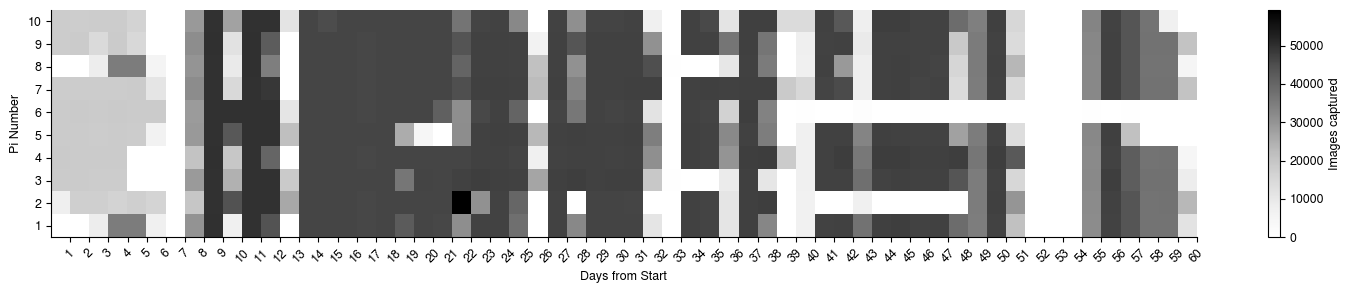

In [12]:
treatment_times['datetime'] = pd.to_datetime(treatment_times['datetime']).dt.floor('T')

treatment_times['date'] = treatment_times['datetime'].dt.date
daily_counts = treatment_times.groupby(['pi', 'date']).size().unstack(fill_value=0)

pi_numbers = sorted(treatment_times['pi'].unique())
dates = pd.date_range(start=daily_counts.columns.min(), end=daily_counts.columns.max(), freq='D')
heatmap = daily_counts.reindex(index=pi_numbers, columns=dates, fill_value=0)

days_from_start = (dates - dates[0]).days +1
norm = mcolors.Normalize(vmin=0, vmax=heatmap.values.max())

plt.figure(figsize=(15, 3))
plt.imshow(
    heatmap.values,
    aspect='auto',
    cmap='Greys',  
    extent=[-1, len(days_from_start) - 1, min(pi_numbers) - 0.5, max(pi_numbers) + 0.5],
    norm=norm
    # vmin=0,
    # vmax=50000
)

plt.colorbar(label='Images captured')

plt.ylabel('Pi Number')
plt.xlabel('Days from Start')
plt.xticks(ticks=np.arange(len(days_from_start)), labels=days_from_start, rotation=45)
plt.yticks(ticks=np.arange(1, 11), labels=np.arange(1, 11))

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

In [30]:
days_from_start

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60],
      dtype='int64')

In [13]:
# bombus_listdir = [file for file in os.listdir('/home/misha/data/bee_cam/bees_to_id_1118') if file.endswith('.jpg')]
# file_df = pd.DataFrame(bombus_listdir)
# file_df[['pi', 'datetime']] = file_df[0].str.extract(r'^pi(\d+)_(\d{8}_\d{6})')
# file_df['pi'] = file_df['pi'].astype(int)
# file_df['datetime'] = pd.to_datetime(file_df['datetime'], format='%Y%m%d_%H%M%S')
# file_df = file_df.rename(columns={0: 'filename'})
# file_df = file_df.sort_values(by=['pi', 'datetime'], ascending=[True, True]).reset_index(drop=True)
# file_df['date'] = file_df['datetime'].dt.date
# file_df['time_diff'] = file_df.groupby(['pi', 'date'])['datetime'].diff().dt.total_seconds()

# bombus_visits = file_df[(file_df['time_diff'] > 4) | (file_df['time_diff'].isna())]


/tmp/ipykernel_110763/3867123995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bombus_visits['datetime'] = pd.to_datetime(bombus_visits['datetime']).dt.floor('T')
/tmp/ipykernel_110763/3867123995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bombus_visits['date'] = bombus_visits['datetime'].dt.date


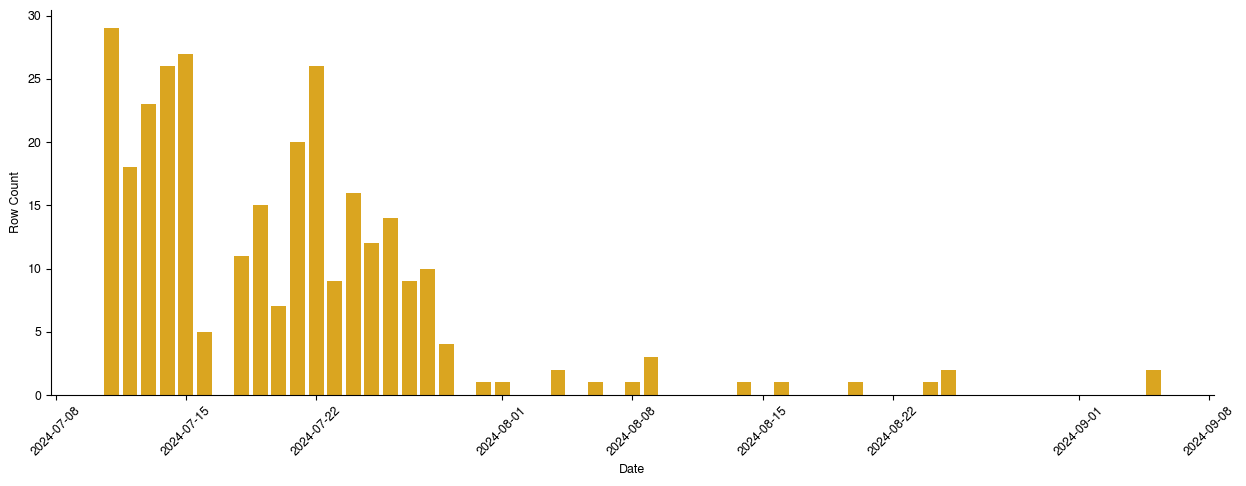

In [14]:
bombus_visits['datetime'] = pd.to_datetime(bombus_visits['datetime']).dt.floor('T')

bombus_visits['date'] = bombus_visits['datetime'].dt.date
date_counts = bombus_visits.groupby('date').size()

plt.figure(figsize=(15, 5))
plt.bar(date_counts.index, date_counts.values, color='goldenrod')

plt.xlabel('Date')
plt.ylabel('Row Count')
plt.xticks(rotation=45)
# plt.xticks(ticks=np.arange(len(days_from_start)), labels=days_from_start, rotation=45)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

/tmp/ipykernel_110763/380675429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apis_visits['datetime'] = pd.to_datetime(apis_visits['datetime']).dt.floor('T')
/tmp/ipykernel_110763/380675429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apis_visits['date'] = apis_visits['datetime'].dt.date


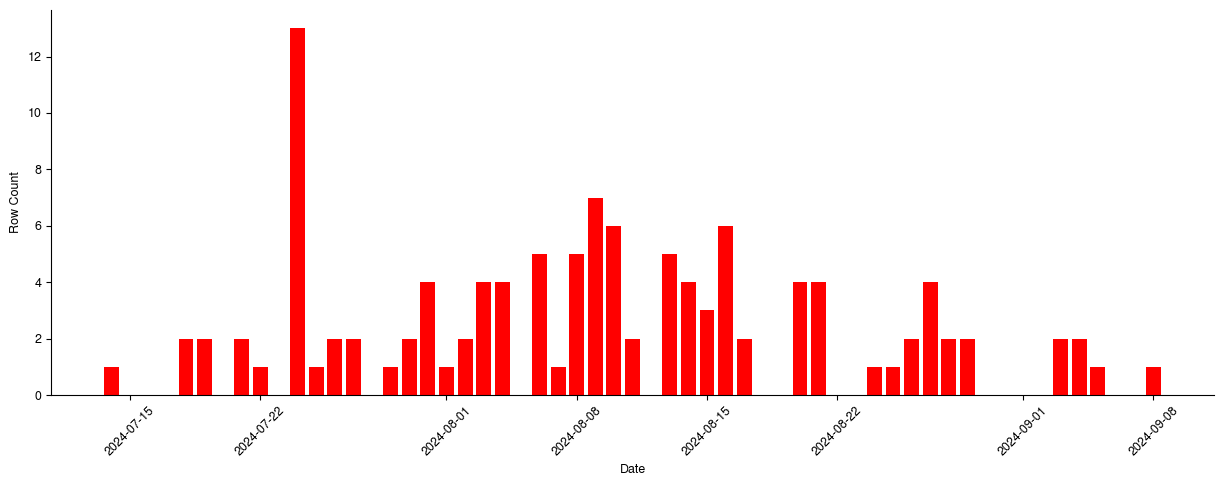

In [15]:
apis_visits['datetime'] = pd.to_datetime(apis_visits['datetime']).dt.floor('T')

apis_visits['date'] = apis_visits['datetime'].dt.date
date_counts = apis_visits.groupby('date').size()

plt.figure(figsize=(15, 5))
plt.bar(date_counts.index, date_counts.values, color='red')

plt.xlabel('Date')
plt.ylabel('Row Count')
plt.xticks(rotation=45)
# plt.xticks(ticks=np.arange(len(days_from_start)), labels=days_from_start, rotation=45)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [16]:
tt_dt_ind = treatment_times.set_index('datetime')
treatment_daylight = tt_dt_ind.between_time('06:00', '20:00').reset_index()
treatment_daylight

,datetime,pi,date,color
0,2024-07-11 06:00:00,1,2024-07-11,cnt
1,2024-07-11 06:00:00,1,2024-07-11,cnt
2,2024-07-11 06:00:00,1,2024-07-11,cnt
3,2024-07-11 06:00:00,1,2024-07-11,cnt
4,2024-07-11 06:00:00,1,2024-07-11,cnt
...,...,...,...,...
17927203,2024-09-08 11:27:00,10,2024-09-08,blv
17927204,2024-09-08 11:27:00,10,2024-09-08,blv
17927205,2024-09-08 11:27:00,10,2024-09-08,blv
17927206,2024-09-08 11:27:00,10,2024-09-08,blv


/tmp/ipykernel_110763/1211439841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bombus_visits['datetime'] = pd.to_datetime(bombus_visits['datetime']).dt.floor('T')
/tmp/ipykernel_110763/1211439841.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apis_visits['datetime'] = pd.to_datetime(apis_visits['datetime']).dt.floor('T')
/tmp/ipykernel_110763/1211439841.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

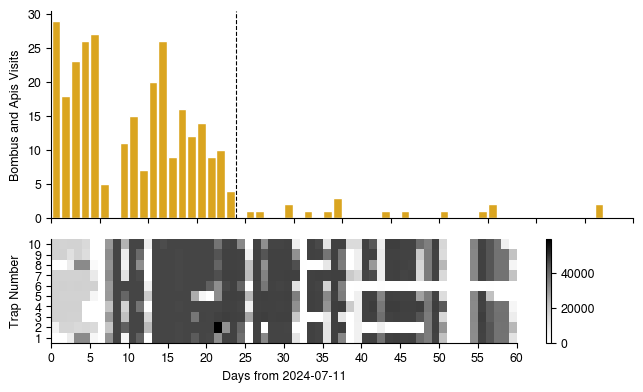

In [31]:

treatment_daylight['datetime'] = pd.to_datetime(treatment_daylight['datetime']).dt.floor('T')
bombus_visits['datetime'] = pd.to_datetime(bombus_visits['datetime']).dt.floor('T')
apis_visits['datetime'] = pd.to_datetime(apis_visits['datetime']).dt.floor('T')

treatment_daylight['date'] = treatment_daylight['datetime'].dt.date
daily_counts = treatment_daylight.groupby(['pi', 'date']).size().unstack(fill_value=0)

bombus_visits['date'] = bombus_visits['datetime'].dt.date
visit_counts_per_date = bombus_visits.groupby('date').size()

apis_visits['date'] = apis_visits['datetime'].dt.date
visit_counts_per_date_apis = apis_visits.groupby('date').size()

dates = pd.date_range(
    start=min(daily_counts.columns.min(), visit_counts_per_date.index.min()),
    end=max(daily_counts.columns.max(), visit_counts_per_date.index.max()),
    freq='D'
)

pi_numbers = sorted(treatment_times['pi'].unique())
heatmap = daily_counts.reindex(index=pi_numbers, columns=dates, fill_value=0)
aligned_visit_counts = visit_counts_per_date.reindex(dates, fill_value=0)
aligned_visit_counts_apis = visit_counts_per_date_apis.reindex(dates, fill_value=0)


days_from_start = (dates - dates[0]).days+1

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.5, 4), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

norm = mcolors.Normalize(vmin=0, vmax=heatmap.values.max())
im = ax2.imshow(
    heatmap.values,
    aspect='auto',
    cmap='Greys',
    extent=[-1, len(days_from_start) - 1, min(pi_numbers) - 0.5, max(pi_numbers) + 0.5],
    norm=norm
)
ax2.set_ylabel('Trap Number')
ax2.yaxis.set_ticks(np.arange(1, 11))
ax2.yaxis.set_ticklabels(np.arange(1, 11))
plt.colorbar(im, ax=ax2, orientation='vertical')
# colorbar = plt.colorbar(im, ax=ax2, orientation='vertical')
# colorbar.set_ticks([colorbar.vmax]) 
# colorbar.set_ticklabels([f'{colorbar.vmax}']) 

ax1.bar(np.arange(len(days_from_start))-0.5, aligned_visit_counts.values, color='goldenrod', edgecolor='white', width=.9)
# ax1.bar(np.arange(len(days_from_start))-0.2, aligned_visit_counts_apis.values, color='#cf0000', width=.3)

# for date in color_change_dates:
#     days_since_start = (pd.Timestamp(date) - pd.Timestamp('2024-07-11')).days
#     ax1.axvline(days_since_start, color='red', linestyle='--', linewidth=0.8)

ax1.axvline((pd.Timestamp('2024-07-29') - pd.Timestamp('2024-07-11')).days+.1, color='k', linestyle='--', linewidth=0.8)


ax1.set_ylabel('Bombus and Apis Visits')
ax2.set_xlabel('Days from 2024-07-11')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


xticks = np.arange(0, len(days_from_start))
xtick_labels = days_from_start[xticks]
# ax2.set_xticks(xticks)
ax2.set_xticklabels(xtick_labels)
ax1.set_xticks(xticks)
ax1.set_xticklabels([])
# ax2.set_xticks(np.arange(len(days_from_start)), labels=days_from_start, rotation=90)
ax2.set_xticks(np.arange(0, len(days_from_start)+1, 5)-1, labels=np.arange(0, 61, 5))

plt.tight_layout()

# plt.savefig('figs/plot_timestamps.svg', format='svg')
# plt.savefig('figs/plot_timestamps_colorbar.svg', format='svg')
# plt.savefig('figs/plot_timestamps_noapis.svg', format='svg')